<a href="https://colab.research.google.com/github/karaage0703/reinforcement-learning-sample/blob/master/colab_tutorials/rl_openai_gym_on_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenAI Gym on Google Colab

必要なライブラリのインストール

In [ ]:
!apt -qq update
!apt -qq -y install libnvtoolsext1
!apt -qq -y install xvfb freeglut3-dev ffmpeg
!pip -q install gym
!pip -q install pyglet
!pip -q install pyopengl
!pip -q install pyvirtualdisplay

68 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  libnvtoolsext1
0 upgraded, 1 newly installed, 0 to remove and 68 not upgraded.
Need to get 31.3 kB of archives.
After this operation, 147 kB of additional disk space will be used.
Selecting previously unselected package libnvtoolsext1:amd64.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../libnvtoolsext1_9.1.85-3ubuntu1_amd64.deb ...
Unpacking libnvtoolsext1:amd64 (9.1.85-3ubuntu1) ...
Setting up libnvtoolsext1:amd64 (9.1.85-3ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.2) ...
/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

freeglut3-dev is already the newest version (2.8.1-3).
freeglut3-dev set to manually installed.
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following additional packages will be installed:
  xserver-common

Virtual Displayの設定

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
#os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

## Check Space

必要なライブラリのインポート

In [ ]:
import gym
import sys
from gym.spaces import *

関数の定義

In [ ]:
def print_spaces(space):
    print(space)

    if isinstance(space, Box):
        print('min:', space.low)
        print('max:', space.high)
    if isinstance(space, Discrete):
        print('min:', 0)
        print('max:', space.n-1)

print_spaces(CartPole-v1)

In [ ]:
env = gym.make('CartPole-v1')
print_spaces(env.action_space)
print_spaces(env.observation_space)

Discrete(2)
min: 0
max: 1
Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)
min: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
max: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


## Cart Pole V1


設定

In [ ]:
# 試行回数
EPISODE_NUMB = 3

# 最大試行時間
MAX_TIME = 2000

試行

In [ ]:
frames = []
for i in range(EPISODE_NUMB):
    observation = env.reset()  # reset for each new trial
    done = False
    total_reward = 0
    total_time = 0
    while not done and total_time < MAX_TIME: # run for 100 timesteps or until done, whichever is first
        frames.append(env.render(mode = 'rgb_array'))
        action = env.action_space.sample()  # select a random action (see https://github.com/openai/gym/wiki/CartPole-v1)
        observation, reward, done, _ = env.step(action)
        total_reward += reward
        total_time += 1
    print('test episode:', i, 'reward:', total_reward, 'time:', total_time)
 
env.render()

test episode: 0 reward: 35.0 time: 35
test episode: 1 reward: 16.0 time: 16
test episode: 2 reward: 13.0 time: 13


True

描画

インポート

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

描画

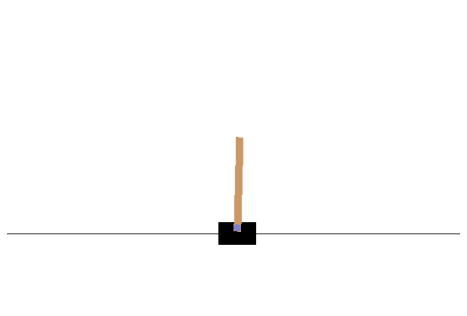

In [ ]:
plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

レベル2

少し戦略的に試行

In [ ]:
frames = []

high_total_reward = 0
high_reward_episode = 0

for i in range(EPISODE_NUMB):
    observation = env.reset()  # reset for each new trial
    done = False
    total_reward = 0
    total_time = 0
    while not done and total_time < MAX_TIME: # run for 100 timesteps or until done, whichever is first
        frames.append(env.render(mode = 'rgb_array'))
        action = 1 if observation[2] > 0 else 0 # if angle if positive, move right. if angle is negative, move left
        observation, reward, done, _ = env.step(action)
        total_reward += reward
        total_time += 1
        if total_reward > high_total_reward:
          high_total_reward = total_reward
          high_reward_episode = i
    print('test episode:', i, 'reward:', total_reward, 'time:', total_time)
 
print('highscore:', high_total_reward ,'episode:', high_reward_episode)
env.render()

test episode: 0 reward: 24.0 time: 24
test episode: 1 reward: 34.0 time: 34
test episode: 2 reward: 35.0 time: 35
highscore: 35.0 episode: 2


True

描画

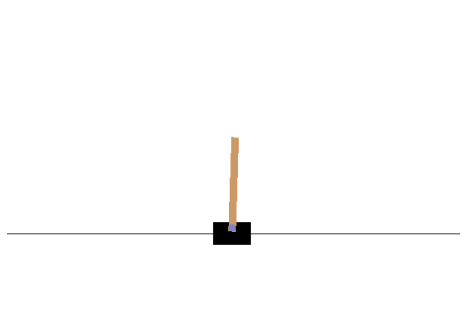

In [ ]:
plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

## 深層学習

ライブラリのインストール

In [ ]:
!pip -q install stable-baselines[mpi]

     |████████████████████████████████| 245kB 20.5MB/s 
     |████████████████████████████████| 1.4MB 15.9MB/s 


In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



モデルの学習

In [ ]:
frames = []
env = gym.make('CartPole-v1')
env = DummyVecEnv([lambda: env])
model = PPO2('MlpPolicy', env, verbose=1)

model.learn(total_timesteps=10000)

--------------------------------------
| approxkl           | 0.00015632427 |
| clipfrac           | 0.0           |
| ep_rewmean         | nan           |
| eplenmean          | nan           |
| explained_variance | -0.00444      |
| fps                | 198           |
| nupdates           | 2             |
| policy_entropy     | 0.692984      |
| policy_loss        | -0.0029335604 |
| serial_timesteps   | 256           |
| time_elapsed       | 2.62e-06      |
| total_timesteps    | 256           |
| value_loss         | 30.763386     |
--------------------------------------
-------------------------------------
| approxkl           | 6.555769e-05 |
| clipfrac           | 0.0          |
| ep_rewmean         | nan          |
| eplenmean          | nan          |
| explained_variance | -0.00156     |
| fps                | 486          |
| nupdates           | 3            |
| policy_entropy     | 0.69233334   |
| policy_loss        | -0.000637074 |
| serial_timesteps   | 384         

試行

In [ ]:
state = env.reset()

for i in range(2000):
    frames.append(env.render(mode = 'rgb_array'))

    action, _ = model.predict(state, deterministic=True)

    state, rewards, done, info = env.step(action)

    if done:
        break

env.close()

描画

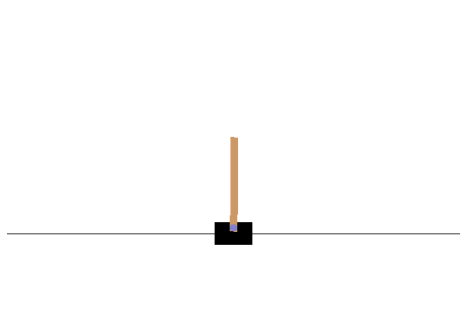

In [ ]:
plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())

## 参考リンク

- https://qiita.com/pocokhc/items/a8120b0abd5941dd7a9f